## Problem Set #[9]
MACS 30150, Dr. Evans

Linghui Wu

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import uniform as sp_uniform
from scipy.stats import randint as sp_randint
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

### Question 1

#### (a)

In [2]:
drink = pd.read_csv("data/strongdrink.txt")
drink.head()

,cultivar,alco,malic,ash,alk,magn,tot_phen,flav,nonfl_phen,proanth,color_int,hue,OD280rat,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
drink.isna().sum()

cultivar      0
alco          0
malic         0
ash           0
alk           0
magn          0
tot_phen      0
flav          0
nonfl_phen    0
proanth       0
color_int     0
hue           0
OD280rat      0
proline       0
dtype: int64

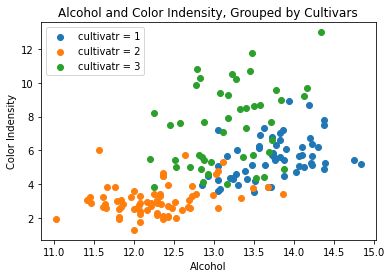

In [4]:
alco = drink["alco"]
color_int = drink["color_int"]

for i in range(1, 4):
    plt.scatter(alco.loc[drink["cultivar"] == i], color_int.loc[drink["cultivar"] == i], label="cultivatr = " + str(i))

plt.xlabel("Alcohol")
plt.ylabel("Color Indensity")
plt.title("Alcohol and Color Indensity, Grouped by Cultivars")
plt.legend()
plt.show();

#### (b)

In [5]:
X = drink[["alco", "malic", "tot_phen", "color_int"]]
y = drink["cultivar"]

In [6]:
lr = LogisticRegression(solver="lbfgs", multi_class="multinomial")

params_dist1 = {
    "penalty": ["l1", "l2"],
    "C": sp_uniform(0.1, 10.0)
}

search1 = RandomizedSearchCV(
    lr, 
    param_distributions=params_dist1,
    n_iter=200,
    n_jobs=-1,
    cv=5,
    random_state=25,
    scoring="neg_mean_squared_error"
)

search1.fit(X, y)
print("The optimal tuning parameter values of Logistic Regression are {}.".format(search1.best_params_))
print("The MSE of the optimal results of Logistic Regression is {}.".format(abs(search1.best_score_)))

The optimal tuning parameter values of Logistic Regression are {'C': 9.565064414817147, 'penalty': 'l2'}.
The MSE of the optimal results of Logistic Regression is 0.09571428571428572.


#### (c)

In [7]:
rf = RandomForestClassifier(bootstrap=True, oob_score=True)

params_dist2 = {'n_estimators': sp_randint(10, 200),
               'max_depth': sp_randint(2, 4),
               'min_samples_split': sp_randint(2, 20),
               'min_samples_leaf': sp_randint(2, 20),
               'max_features': sp_randint(1, 4)}

search2 = RandomizedSearchCV(
    rf,
    param_distributions=params_dist2,
    n_iter=200,
    n_jobs=-1,
    cv=5,
    random_state=25,
    scoring="neg_mean_squared_error"
)

search2.fit(X, y)
print("The optimal tuning parameter values of Random Forest are {}.".format(search2.best_params_))
print("The MSE of the optimal results of Random Forest is {}.".format(abs(search2.best_score_)))

The optimal tuning parameter values of Random Forest are {'max_depth': 3, 'max_features': 1, 'min_samples_leaf': 17, 'min_samples_split': 14, 'n_estimators': 94}.
The MSE of the optimal results of Random Forest is 0.11904761904761904.


#### (d)

In [8]:
svc = SVC(kernel="rbf")

params_dist3 = {
    "C": sp_uniform(loc=0.1, scale=10.0),
    "gamma": ["scale", "auto"],
    "shrinking": [True, False]
}

search3 = RandomizedSearchCV(
    svc,
    param_distributions=params_dist3,
    n_iter=200,
    n_jobs=-1,
    cv=5,
    random_state=25,
    scoring="neg_mean_squared_error"
)

search3.fit(X, y)
print("The optimal tuning parameter values of SVM are {}.".format(search3.best_params_))
print("The MSE of the optimal results of SVM is {}.".format(abs(search3.best_score_)))

The optimal tuning parameter values of SVM are {'C': 8.801241366272118, 'gamma': 'scale', 'shrinking': False}.
The MSE of the optimal results of SVM is 0.1461904761904762.


#### (e)

In [9]:
mlp = MLPClassifier(solver="lbfgs", max_iter=1000)

params_dist4 = {
    "hidden_layer_sizes": sp_randint(1, 100),
    "activation": ["logistic", "relu"],
    "alpha": sp_uniform(0.1, 10.0)
}

search4 = RandomizedSearchCV(
    mlp,
    param_distributions=params_dist4,
    n_iter=200,
    n_jobs=-1,
    cv=5,
    random_state=25,
    scoring="neg_mean_squared_error"
)

search4.fit(X, y)
print("The optimal tuning parameter values of Neural Network are {}.".format(search4.best_params_))
print("The MSE of the optimal results of Neural Network is {}.".format(abs(search4.best_score_)))

The optimal tuning parameter values of Neural Network are {'activation': 'relu', 'alpha': 0.3814739739579308, 'hidden_layer_sizes': 42}.
The MSE of the optimal results of Neural Network is 0.0726984126984127.


#### (f)

In [10]:
print("MSE of the optimal results from different classifiers:\n")

MSE = {
    "Logistic Regression:": abs(search1.best_score_),
    "Random Forest:": abs(search2.best_score_),
    "SVM:": abs(search3.best_score_),
    "Neural Network:": abs(search4.best_score_)
}

for k, v in MSE.items():
    print(k, v)

min_mse = min(MSE.values())
method = [k for k, v in MSE.items() if v == min_mse]

print("\nThe best predictor of `cultivar` is {} because it has the smallesr MSE.".format(method[0]))

MSE of the optimal results from different classifiers:

Logistic Regression: 0.09571428571428572
Random Forest: 0.11904761904761904
SVM: 0.1461904761904762
Neural Network: 0.0726984126984127

The best predictor of `cultivar` is Neural Network: because it has the smallesr MSE.
